In [2]:
# Importación de librerías para el manejo y análisis de datos
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías para la visualización de datos

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
from chart_studio import plotly
# from plotly import plotly as py
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # este código, nos permite trabajar con la versión plotly offline
# Usamos plotly + cufflinks en modo offline 
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

In [4]:
# Read Excel file
pendulo = pd.read_csv('Péndulo.csv')
print("Shape of dataframe is: {}".format(pendulo.shape))

Shape of dataframe is: (5, 24)


In [8]:
pendulo

,Longitud (m),Error de longitud (m),Tiempo 1 (s),Error de tiempo 1 (s),Tiempo 2 (s),Error de tiempo 2 (s),Tiempo 3 (s),Error de tiempo 3 (s),Tiempo medio (s),Error de tiempo medio (s),Tiempo medio al cuadrado (s^2),Error de tiempo medio al cuadrado (s^2),Ángulo (rad),Error de ángulo (rad),Seno al cuadrado de mitad el ángulo (rad^2),Error de seno al cuadrado de mitad el ángulo (rad^2),Tiempo 1 (s).1,Error de tiempo 1 (s).1,Tiempo 2 (s).1,Error de tiempo 2 (s).1,Tiempo 3 (s).1,Error de tiempo 3 (s).1,Tiempo medio (s).1,Error de tiempo medio (s).1
0,0.15,0.001,0.65664,0.00002,0.66622,0.00002,0.63844,0.00002,0.65377,0.00002,0.42741,0.000026,0.35,0.02,0.030,0.003,1.33992,0.00002,1.34232,0.00002,1.33980,0.00002,1.34068,0.00002
1,0.20,0.001,0.89970,0.00002,0.90036,0.00002,0.89972,0.00002,0.89993,0.00002,0.80987,0.000036,0.52,0.02,0.067,0.004,1.35924,0.00002,1.36100,0.00002,1.36338,0.00002,1.36121,0.00002
2,0.30,0.001,0.94070,0.00002,0.94356,0.00002,0.95006,0.00002,0.94477,0.00002,0.89260,0.000038,0.70,0.02,0.117,0.006,1.37808,0.00002,1.37892,0.00002,1.38036,0.00002,1.37912,0.00002
3,0.35,0.001,1.15288,0.00002,1.15448,0.00002,1.15874,0.00002,1.15537,0.00002,1.33487,0.000046,0.87,0.02,0.179,0.007,1.41236,0.00002,1.41182,0.00002,1.41192,0.00002,1.41203,0.00002
4,0.45,0.001,1.37742,0.00002,1.38826,0.00002,1.38154,0.00002,1.38241,0.00002,1.91105,0.000055,1.05,0.02,0.250,0.008,1.44234,0.00002,1.44002,0.00002,1.44490,0.00002,1.44242,0.00002


In [9]:
pendulo.dtypes

Longitud (m)                                            float64
Error de longitud (m)                                   float64
Tiempo 1 (s)                                            float64
Error de tiempo 1 (s)                                   float64
Tiempo 2 (s)                                            float64
Error de tiempo 2 (s)                                   float64
Tiempo 3 (s)                                            float64
Error de tiempo 3 (s)                                   float64
Tiempo medio (s)                                        float64
Error de tiempo medio (s)                               float64
Tiempo medio al cuadrado (s^2)                          float64
Error de tiempo medio al cuadrado (s^2)                 float64
Ángulo (rad)                                            float64
Error de ángulo (rad)                                   float64
Seno al cuadrado de mitad el ángulo (rad^2)             float64
Error de seno al cuadrado de mitad el án

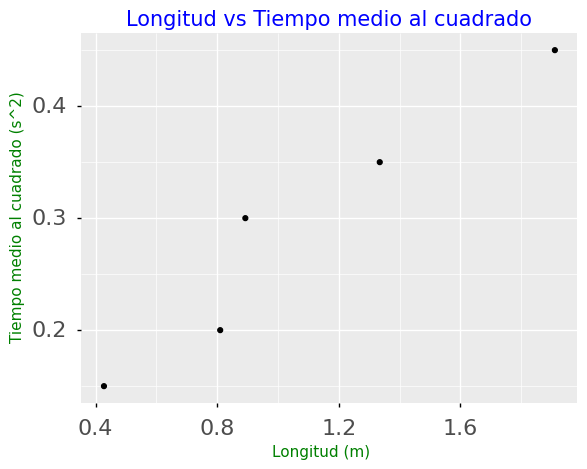

In [6]:
import plotnine as p9
myplot = (p9.ggplot(data=pendulo,
                    mapping=p9.aes(x='Tiempo medio al cuadrado (s^2)', y='Longitud (m)')) +
              p9.geom_point())

# convierte el output de plotnine a un objeto de matplotlib
my_plt_version = myplot.draw()

# Realiza más ajustes al gráfico con matplotlib:
p9_ax = my_plt_version.axes[0] # cada subgráfico es un ítem en una lista
p9_ax.set_xlabel("Longitud (m)", color = 'g')
p9_ax.set_ylabel("Tiempo medio al cuadrado (s^2)", color = 'g')
p9_ax.tick_params(labelsize=16, pad=8)
p9_ax.set_title('Longitud vs Tiempo medio al cuadrado', fontsize=15, color = 'b')
plt.show() # esto no es necesario en Jupyter Notebooks

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
pendulo = pd.read_csv("Péndulo.csv")

In [2]:
# Vamos a determinar el retraso en la llegada a partir del retraso en la salida.
# Ambas variables están muy correlacionadas.
pendulo = pendulo.dropna(subset = ["Longitud (m)"])
# Vamos a determinar predecir el retraso en la llegada ArrDelay a partir del retraso en la salida DepDelay
Y = pendulo["Tiempo medio al cuadrado (s^2)"]
X = pendulo[["Longitud (m)"]]

In [3]:
# A continuación ajustamos el modelo.
regr = linear_model.LinearRegression()
# Ajuste con X e Y definidos con anterioridad.
regr.fit(X, Y)

# Imprimimos el valor de las Betas... corresponden con los coeficientes de las variables dependientes 
# (en este caso sólo hay una).
print("Coeficientes: ", regr.coef_)

Y_pred = regr.predict(X)
# R2 nos va a decir cuán bueno es el modelo, cuanto más próximo a 1, el modelo es mejor.
print("R cuadrado: ", r2_score(Y, Y_pred))

Coeficientes:  [4.59755263]
R cuadrado:  0.93438168092597


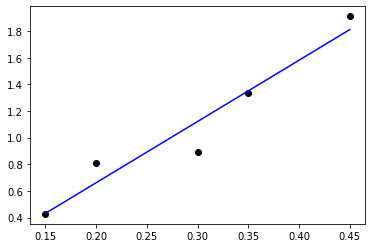

In [4]:
# Mostramos los resultados de forma gráfica, junto con la recta de regresión.
plt.scatter(X[0:1000], Y[0:1000], color = "black")
plt.plot(X[0:1000], Y_pred[0:1000], color = "blue")
plt.show()